# Behavioral Cloning

In [5]:
import tensorflow as tf
import keras
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print('Tensorflow version {0}'.format(tf.__version__))
print('Keras version {0}'.format(keras.__version__))

Tensorflow version 1.0.1
Keras version 2.0.2


## File I/O
Want to read in a directory of jpg files and write out hdf5

In [2]:
log = pd.read_csv('./driving_data/driving_log.csv', names=['CenterImg', 'LeftImg', 'RightImg', 
                                                           'SteeringAngle', 'Throttle', 'Break', 'Speed'])
log.head()

,CenterImg,LeftImg,RightImg,SteeringAngle,Throttle,Break,Speed
0,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,0.0,0.0,0,0.007891
1,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,0.0,0.0,0,0.000517
2,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,0.0,0.0,0,0.000529
3,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,0.0,0.0,0,0.000387
4,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,/home/sketchc89/Simulated-Driving/driving_data...,0.0,0.0,0,0.000216


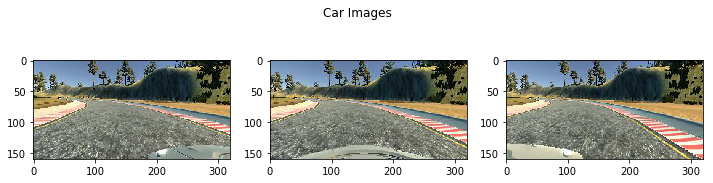

In [3]:
center = mpimg.imread(log['CenterImg'][0])
left = mpimg.imread(log['LeftImg'][0])
right = mpimg.imread(log['RightImg'][0])
fig = plt.figure(figsize=(12,3))
plt.suptitle('Car Images')
axl = plt.subplot(1,3,1)
plt.imshow(left)
axc = plt.subplot(1,3,2)
plt.imshow(center)
axr = plt.subplot(1,3,3)
plt.imshow(right)
plt.show()

In [4]:
images = []
measurements = []
for i in range(log.shape[0]):
    center = mpimg.imread(log['CenterImg'][i])
    left = mpimg.imread(log['LeftImg'][i])
    right = mpimg.imread(log['RightImg'][i])
    center_flip = np.fliplr(center)
    left_flip = np.fliplr(left)
    right_flip = np.fliplr(right)
    images.append(center)
    images.append(left)
    images.append(right)
    images.append(center_flip)
    images.append(left_flip)
    images.append(right_flip)
    measurements.append(log['SteeringAngle'][i])
    measurements.append(log['SteeringAngle'][i])
    measurements.append(log['SteeringAngle'][i])
    measurements.append(-log['SteeringAngle'][i])
    measurements.append(-log['SteeringAngle'][i])
    measurements.append(-log['SteeringAngle'][i])
X_train = np.array(images)
y_train = np.array(measurements)

In [6]:
history_object = model.fit_generator(train_generator, samples_per_epoch =
    len(train_samples), validation_data = 
    validation_generator,
    nb_val_samples = len(validation_samples), 
    nb_epoch=5, verbose=2)

NameError: name 'model' is not defined

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D
from keras.layers import MaxPooling2D, Cropping2D

model = Sequential()
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x/255.0 - 0.5))
model.add(Conv2D(24, (5,5), activation='elu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(36, (5,5), activation='elu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(48, (5,5), activation='elu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='elu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='elu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history_object = model.fit(X_train, y_train, validation_split=0.2, 
          shuffle=True, verbose=2)
model.save('model.h5')

Train on 6907 samples, validate on 1727 samples
Epoch 1/10
11s - loss: 0.0128 - val_loss: 0.0039
Epoch 2/10
10s - loss: 0.0029 - val_loss: 0.0034
Epoch 3/10
10s - loss: 0.0020 - val_loss: 0.0038
Epoch 4/10
10s - loss: 0.0016 - val_loss: 0.0041
Epoch 5/10
10s - loss: 0.0011 - val_loss: 0.0052
Epoch 6/10
10s - loss: 8.5682e-04 - val_loss: 0.0043
Epoch 7/10
10s - loss: 7.2454e-04 - val_loss: 0.0042
Epoch 8/10
10s - loss: 6.3838e-04 - val_loss: 0.0041
Epoch 9/10
10s - loss: 5.0934e-04 - val_loss: 0.0042
Epoch 10/10
10s - loss: 4.5412e-04 - val_loss: 0.0043


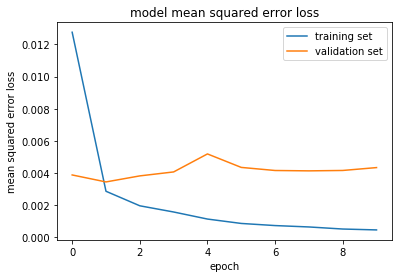

In [10]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()